In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
font = {'size':12}
plt.rc('font', **font)

In [2]:
#leer analizar y corregir datos NaN en Dataset

os.chdir(r"C:\Users\chris\Downloads\1 Cursos  UNAD\52 ANÁLISIS DE DATOS\Tarea 3\Jupyter Python DS_Titanic") #se pone una r al inicio para que python lo tome como un directorio y no genere error
datos=pd.read_csv("Titanic.csv", delimiter=',')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Verificar tipo de datos
datos.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#conteo de columnas y saca datos estadisticos (conteo, mediana, cuartiles etc)
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#isna: devuelve datos na como true/false y con esto hacemos una suma
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#rellenamos los na en Edad por la media de edades
mediaEdades=round(datos['Age'].mean())
datos['Age']=datos['Age'].fillna(mediaEdades)
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
datos['Cabin']=datos['Cabin'].fillna("NE")
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [8]:
#hacemos lo mismo con Embarked rellenamos los na
datos['Embarked']=datos['Embarked'].fillna("NE")
datos.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#conteo de los datos de Cabin
datos['Cabin'].value_counts()

NE             687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [10]:
#conteo de los datos de Embarked
datos['Embarked'].value_counts()

S     644
C     168
Q      77
NE      2
Name: Embarked, dtype: int64

In [11]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [12]:
#Para mejor visualizacion de la data hacemos algunos ajustes:
datos['Survived']=datos['Survived'].map({
    0:'No',
    1:'Yes'
    
})
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,S


In [13]:
#Para mejor visualizacion de la data hacemos algunos ajustes:
datos['Embarked']=datos['Embarked'].map({
    'S':'Southampton',
    'C':'Cherbourg',
    'Q':'Queenstown'
})
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


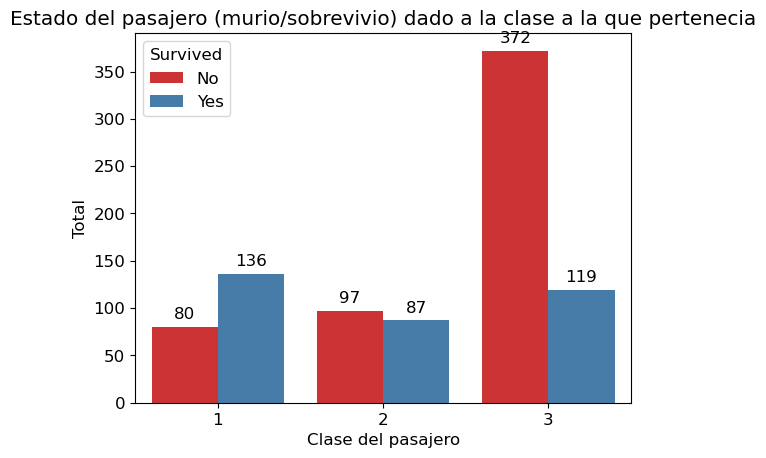

In [14]:
#luego de preparar la data revisamos
datos.groupby(['Pclass','Survived'])['Survived'].count()
ax=sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=datos)
ax.set(title='Estado del pasajero (murio/sobrevivio) dado a la clase a la que pertenecia',
      xlabel='Clase del pasajero', ylabel='Total')
#Agregar etiquetas de datos:
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

In [15]:
datos.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  No           81
        Yes         233
male    No          468
        Yes         109
Name: Survived, dtype: int64

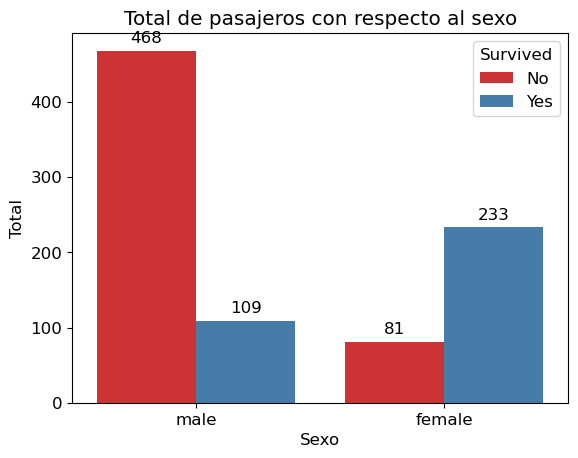

In [16]:
ax=sns.countplot(x='Sex', hue='Survived', palette='Set1', data=datos)
ax.set(title='Total de pasajeros con respecto al sexo',
      xlabel='Sexo', ylabel='Total')
#Agregar etiquetas de datos:
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

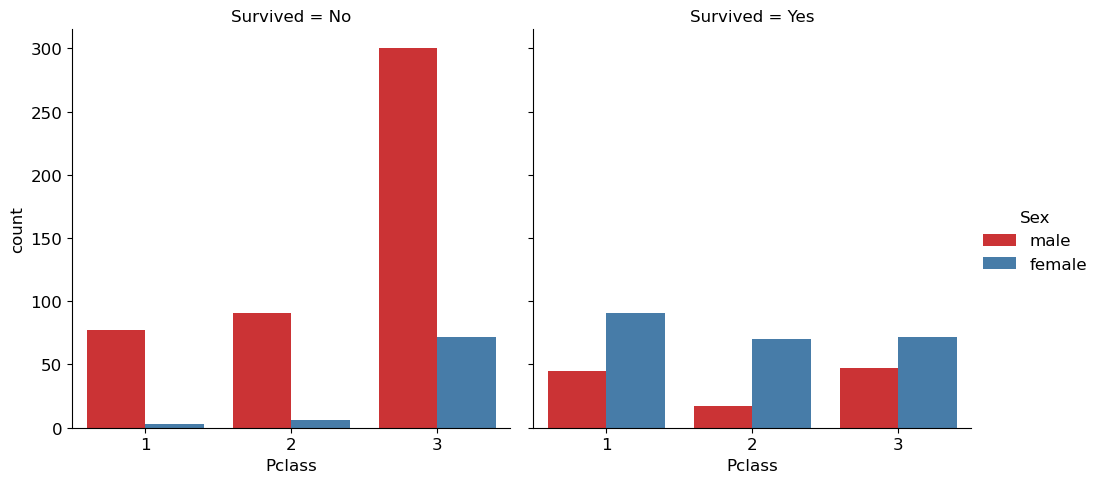

In [17]:
# crear varios tipos de gráficos categóricos en una única figura
ax=sns.catplot(x='Pclass', hue='Sex', col='Survived', palette='Set1',
              data=datos, kind='count')
plt.show()

In [18]:
#mostrar etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height=bar.get_height()
        ax.annotate('{}'.format(height),
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0,3),
        textcoords="offset points",
        ha='center', va='bottom')

In [19]:
#presenta una tabla dinamica con datos de la edad media por cabina
aux=datos.pivot_table(values='Age', index='Cabin', aggfunc='mean')
aux

,Age
Cabin,
A10,36.00000
A14,30.00000
A16,48.00000
A19,30.00000
A20,49.00000
...,...
F38,30.00000
F4,2.50000
G6,14.75000


In [20]:
datos.groupby('Cabin').filter(lambda x: (x['Cabin']=="F4").any())
datos.groupby('Cabin').filter(lambda x: (x['Cabin'] =="F4").any())['Age']



183    1.0
618    4.0
Name: Age, dtype: float64

In [21]:
#muestra las primeras 5 cabinas
aux.index[:5].to_list()

['A10', 'A14', 'A16', 'A19', 'A20']

In [22]:
#edad primeras 5 cabinas
aux[:5]['Age'].to_list()

[36.0, 30.0, 48.0, 30.0, 49.0]

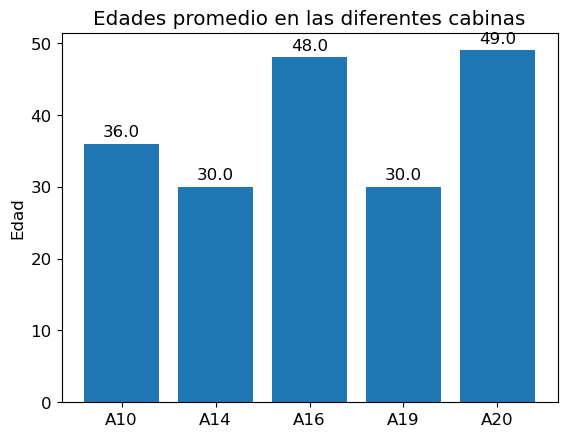

In [23]:
#Grafica Edad promedio de las primeras 5 cabinas
fig, ax=plt.subplots()
ax.set_ylabel('Edad')
ax.set_title('Edades promedio en las diferentes cabinas')
bar1=ax.bar(aux.index[:5].to_list(), aux[:5]['Age'].to_list())

autolabel(bar1)
plt.show()

In [24]:
#Lugares de embarque vs si sobrevivio o no
pd.crosstab(datos['Embarked'], datos['Survived'])

Survived,No,Yes
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


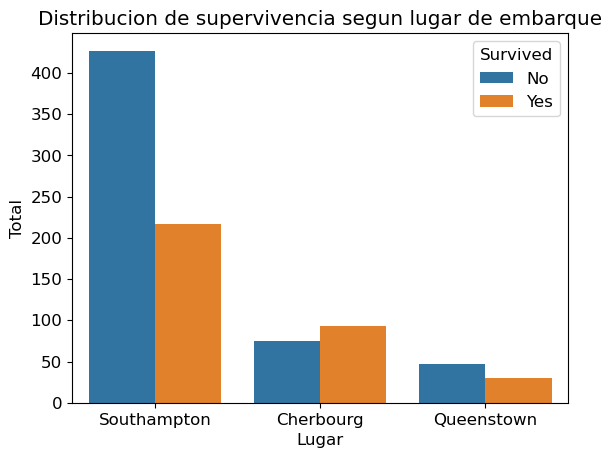

In [25]:
#Se grafican los datos
ax=sns.countplot(x='Embarked', hue='Survived', data=datos)
ax.set(title='Distribucion de supervivencia segun lugar de embarque',
      xlabel='Lugar', ylabel='Total')
plt.show()

In [26]:
#conteo de personas por cabina
datos['Cabin'].groupby(datos['Cabin']).count()

Cabin
A10      1
A14      1
A16      1
A19      1
A20      1
      ... 
F38      1
F4       2
G6       4
NE     687
T        1
Name: Cabin, Length: 148, dtype: int64

In [27]:
#conteo Personas menores de 18 años
datos[datos['Age']<18]['Age'].count()

113

In [28]:
#cantidad de personas menores de 18 años por clase
intervaloEdad1=datos[datos['Age']<18].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad1

,Age
Pclass,
1,12
2,23
3,78


In [29]:
#cantidad de personas mayores igual de 18 años y menoresd e 50 años por clase
intervaloEdad2=datos[(datos['Age']>=18) & (datos['Age']<=50)].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad2

,Age
Pclass,
1,165
2,146
3,403


In [30]:
#cantidad de personas mayores 50 años  por clase
intervaloEdad3=datos[datos['Age']>50].pivot_table(values='Age', index='Pclass', aggfunc='count')
intervaloEdad3

,Age
Pclass,
1,39
2,15
3,10


In [31]:
#etiquetas grafica pastel/pie
def funcPie(values):
    val=iter(values)
    return lambda pct: f"{pct:.1f}% ({next(val)})"

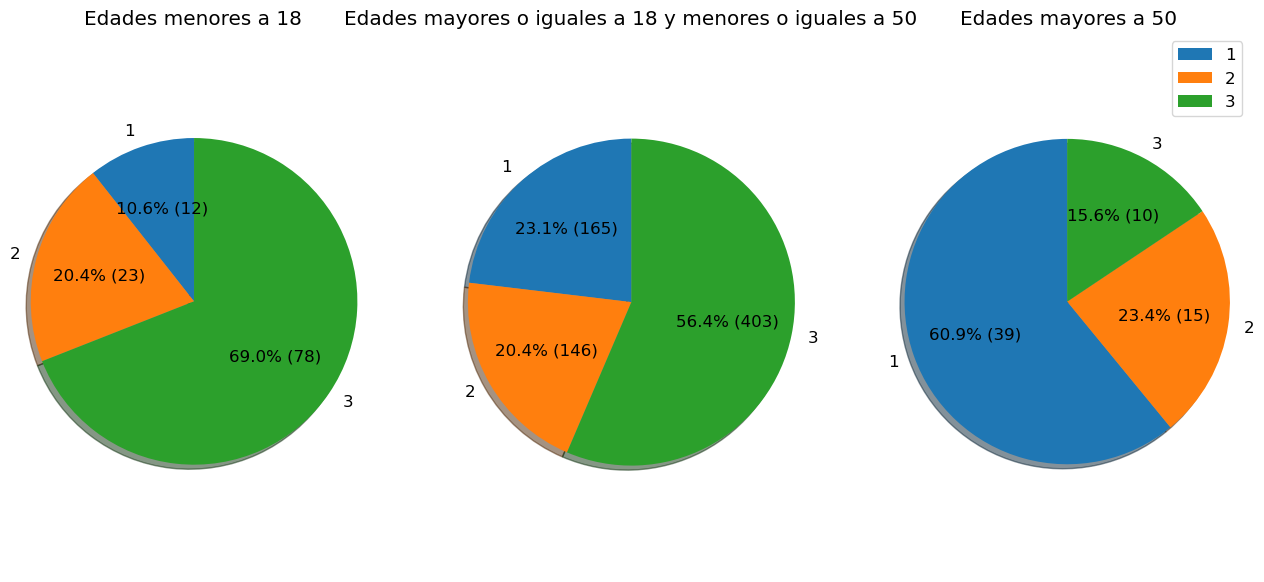

In [32]:
#se grafican los pies con los datos anteriores
fig, ax=plt.subplots(1, 3, figsize = (16, 7))
ax[0].pie(intervaloEdad1['Age'].to_list(), labels=intervaloEdad1.index.to_list(), 
        autopct=funcPie(intervaloEdad1['Age'].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Edades menores a 18')  
ax[1].pie(intervaloEdad2['Age'].to_list(), labels=intervaloEdad2.index.to_list(),
        autopct=funcPie(intervaloEdad2['Age'].to_list()), shadow=True, startangle=90)
ax[1].axis('equal') 
ax[1].set_title('Edades mayores o iguales a 18 y menores o iguales a 50')  
ax[2].pie(intervaloEdad3['Age'].to_list(), labels=intervaloEdad3.index.to_list(),
        autopct=funcPie(intervaloEdad3['Age'].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')  
ax[2].set_title('Edades mayores a 50') 
plt.legend()
plt.show()



In [33]:
#devuelve nombres que contengan Carter
datos[datos['Name'].str.match("Carter"+ r'\b', case=False)]['Name']



249                    Carter, Rev. Ernest Courtenay
390                       Carter, Mr. William Ernest
435                        Carter, Miss. Lucile Polk
763        Carter, Mrs. William Ernest (Lucile Polk)
802              Carter, Master. William Thornton II
854    Carter, Mrs. Ernest Courtenay (Lilian Hughes)
Name: Name, dtype: object

In [46]:
#lista de 5 familias apellidos
familias=[]
for i in datos['Name']:
    apellido=str(i).split(',')[0]
    f=datos[datos['Name'].str.match(apellido+ r'\b', case=False)]['Name'].to_list()
    if(familias.count(f)==0):
        familias.append(f)
familias[:5]


[['Braund, Mr. Owen Harris', 'Braund, Mr. Lewis Richard'],
 ['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen, Miss. Laina'],
 ['Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'Futrelle, Mr. Jacques Heath'],
 ['Allen, Mr. William Henry', 'Allen, Miss. Elisabeth Walton']]

In [35]:
#cantidad de familias
len(familias)

667

In [36]:
#lista 5 familias que comparten apellidos
for i in range(0, len(familias)-1):
    for j in range(i+1, len(familias)):
        if len(familias[j])>len(familias[i]):
            aux=familias[i]
            familias[i]=familias[j]
            familias[j]=aux
familias[:5]

[['Andersson, Mr. Anders Johan',
  'Andersson, Miss. Erna Alexandra',
  'Andersson, Miss. Ellis Anna Maria',
  'Andersson, Mr. August Edvard ("Wennerstrom")',
  'Andersson, Miss. Ingeborg Constanzia',
  'Andersson, Miss. Sigrid Elisabeth',
  'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
  'Andersson, Miss. Ebba Iris Alfrida',
  'Andersson, Master. Sigvard Harald Elias'],
 ['Sage, Master. Thomas Henry',
  'Sage, Miss. Constance Gladys',
  'Sage, Mr. Frederick',
  'Sage, Mr. George John Jr',
  'Sage, Miss. Stella Anna',
  'Sage, Mr. Douglas Bullen',
  'Sage, Miss. Dorothy Edith "Dolly"'],
 ['Panula, Master. Juha Niilo',
  'Panula, Master. Eino Viljami',
  'Panula, Mr. Ernesti Arvid',
  'Panula, Mrs. Juha (Maria Emilia Ojala)',
  'Panula, Mr. Jaako Arnold',
  'Panula, Master. Urho Abraham'],
 ['Goodwin, Master. William Frederick',
  'Goodwin, Miss. Lillian Amy',
  'Goodwin, Master. Sidney Leonard',
  'Goodwin, Master. Harold Victor',
  'Goodwin, Mrs. Frederick (Augusta Tyle

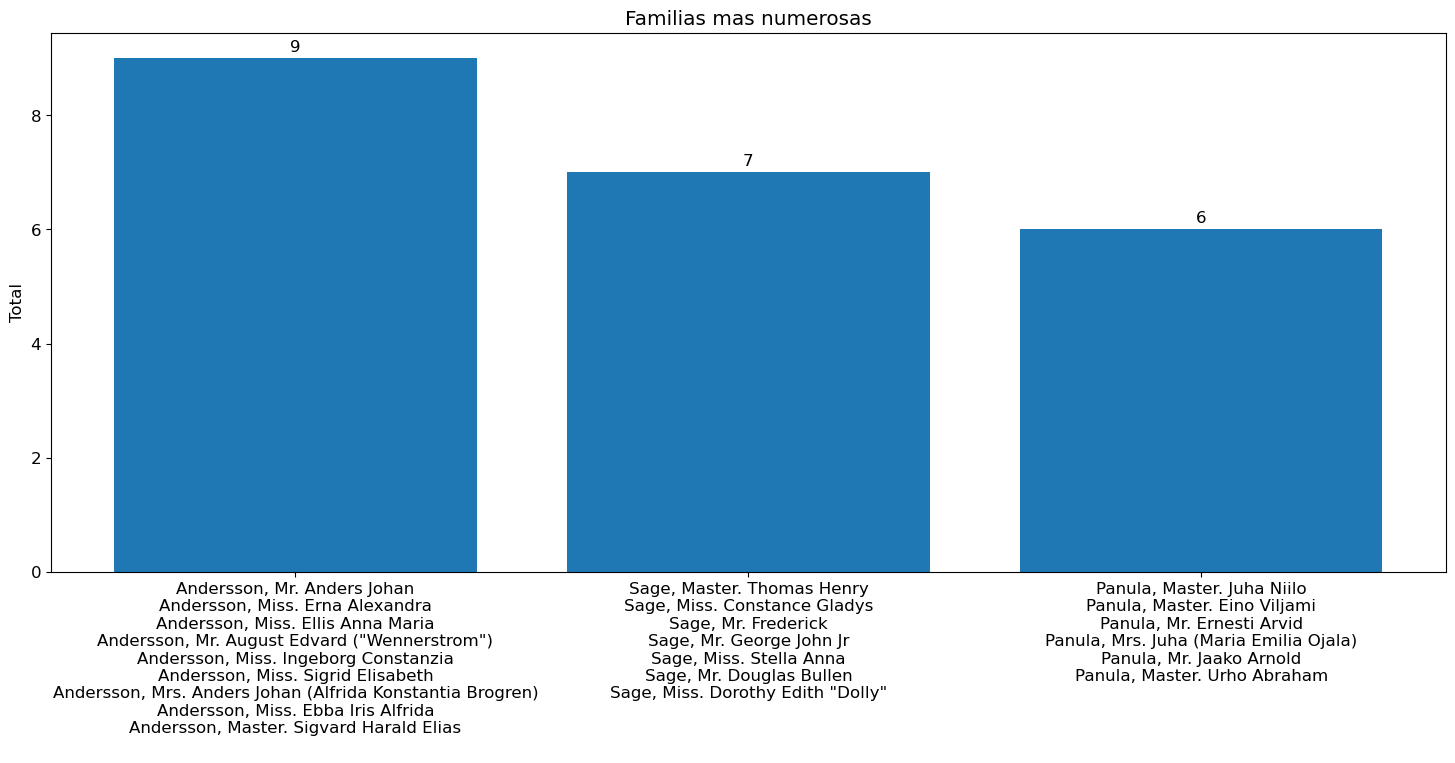

In [37]:
# conteto de integrantes por cada familia mas numerosa
cont=[]
nombreFamilias=[]
for i in familias[:3]:
    aux=""
    cont.append(len(i))
    for j in i:
        aux+=j+'\n'
    nombreFamilias.append(aux)

fig, ax=plt.subplots(figsize = (18, 7))
ax.set_ylabel('Total')
ax.set_title('Familias mas numerosas')
bar1=ax.bar(nombreFamilias, cont)
autolabel(bar1)
plt.show()

In [38]:
#detalle de informacion por edad igual a 50 años
aux=datos[['Age', 'Sex', 'Pclass', 'Survived']].groupby('Age').filter(lambda x: (x['Age']==50).any())
aux



,Age,Sex,Pclass,Survived
177,50.0,female,1,No
259,50.0,female,2,Yes
299,50.0,female,1,Yes
434,50.0,male,1,No
458,50.0,female,2,Yes
482,50.0,male,3,No
526,50.0,female,2,Yes
544,50.0,male,1,No
660,50.0,male,1,Yes
723,50.0,male,2,No


In [39]:
#tabla dinamica con detalle por edad, si sobrevivio o no, y clase
aux.pivot_table(index='Sex', columns=['Survived', 'Pclass'], aggfunc='count').fillna(0)

Age                    
Survived   No            Yes     
Pclass      1    2    3    1    2
Sex                              
female    1.0  0.0  0.0  1.0  3.0
male      2.0  1.0  1.0  1.0  0.0

In [40]:
#agrupa las personas por clase y sexo
aux=datos.groupby(['Pclass', 'Sex'])['Pclass'].count()
aux


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Pclass, dtype: int64

In [41]:
#indice del resultado anterior
aux.index

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])

In [42]:
#indice de la clase 1 por sexo
aux[1]

Sex
female     94
male      122
Name: Pclass, dtype: int64

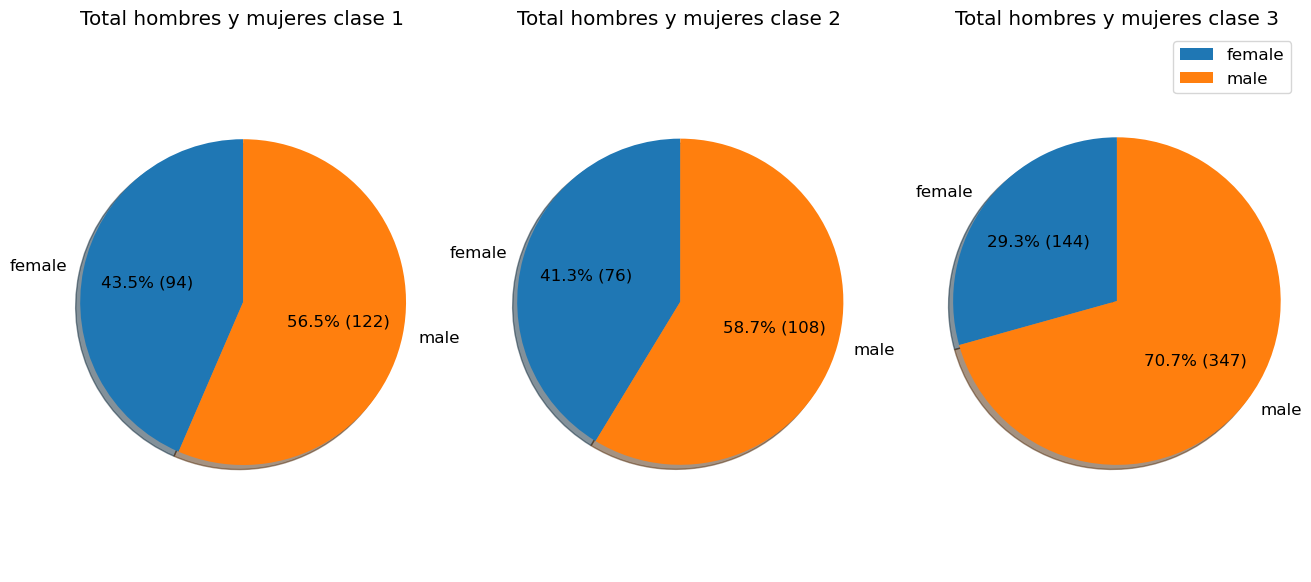

In [43]:
#se grafican en pies ls datos de la cantidad de personas en clases 1, 2 y 3 
fig, ax=plt.subplots(1, 3, figsize = (16, 7))
ax[0].pie(aux[1].to_list(), labels=aux[1].index.to_list(), 
              autopct=funcPie(aux[1].to_list()), shadow=True, startangle=90)
ax[0].axis('equal')
ax[0].set_title('Total hombres y mujeres clase 1')
ax[1].pie(aux[2].to_list(), labels=aux[2].index.to_list(), 
              autopct=funcPie(aux[2].to_list()), shadow=True, startangle=90)
ax[1].axis('equal')
ax[1].set_title('Total hombres y mujeres clase 2')
ax[2].pie(aux[3].to_list(), labels=aux[3].index.to_list(), 
              autopct=funcPie(aux[3].to_list()), shadow=True, startangle=90)
ax[2].axis('equal')
ax[2].set_title('Total hombres y mujeres clase 3')
plt.legend()
plt.show()


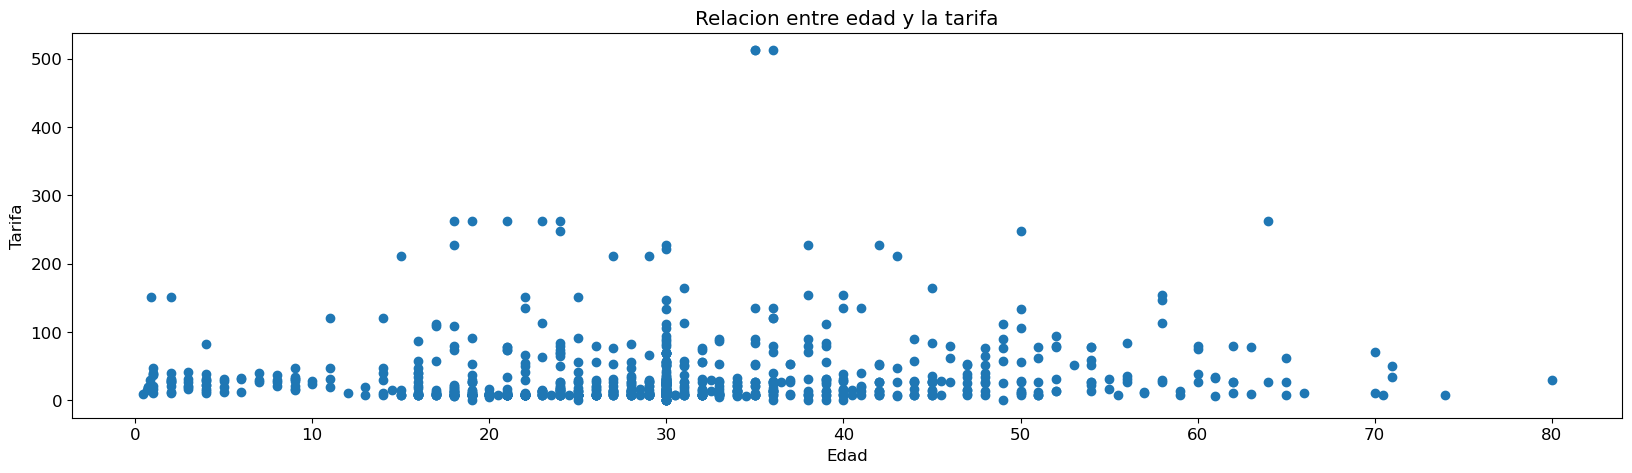

In [44]:
#Diagrama de dispersion se grafica edad y tarifa cantidad de personas
fig, ax=plt.subplots(figsize = (20, 5))
ax.scatter(datos['Age'], datos['Fare'])
ax.set_xlabel('Edad')
ax.set_ylabel('Tarifa')
ax.set_title('Relacion entre edad y la tarifa')
plt.show()


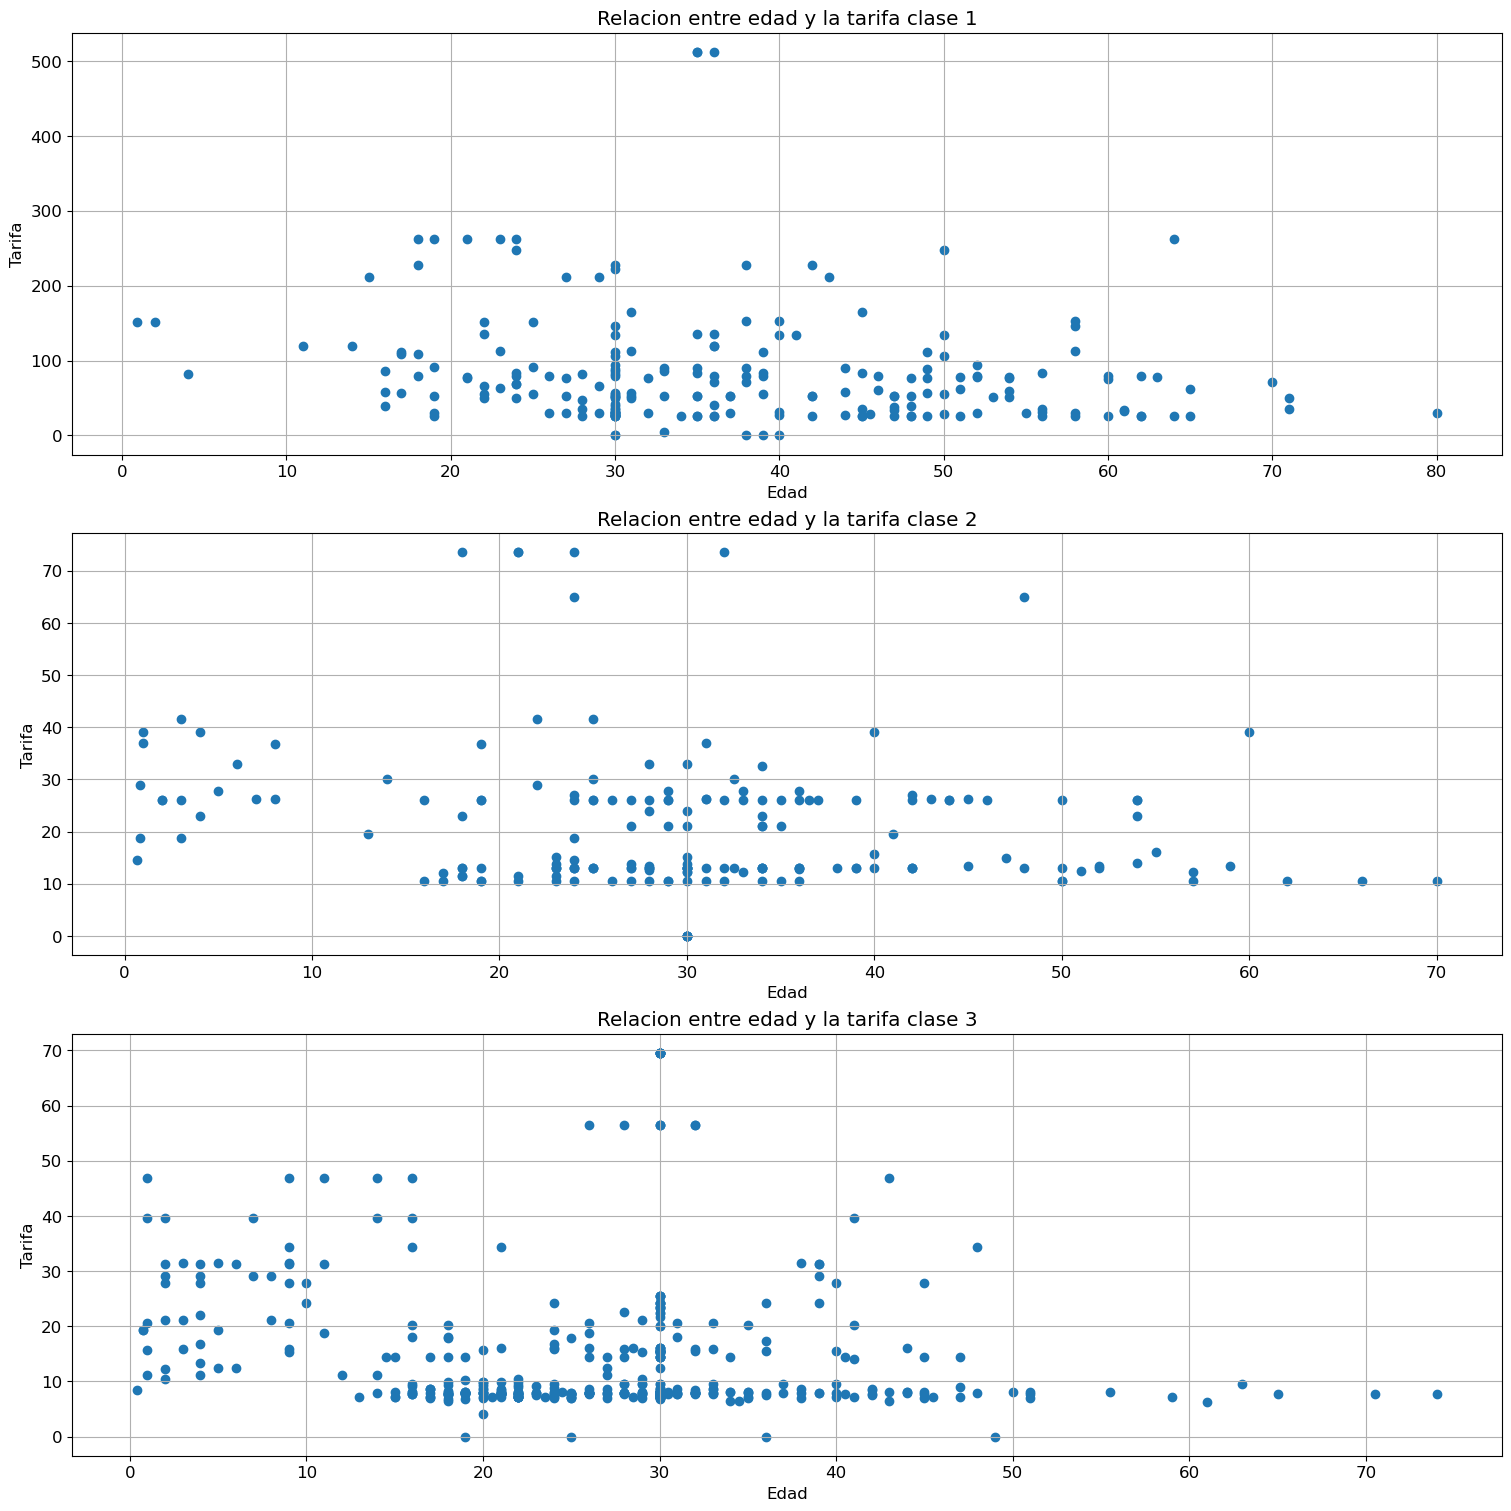

In [48]:
#Crea 3 graficos de dispersion relacionando la tarifa entre clase 1, 2 y 3 y edad 
clase1=datos[['Age', 'Fare', 'Pclass']].groupby('Pclass').filter(lambda x: (x['Pclass']==1).any())
clase2=datos[['Age', 'Fare', 'Pclass']].groupby('Pclass').filter(lambda x: (x['Pclass']==2).any())
clase3=datos[['Age', 'Fare', 'Pclass']].groupby('Pclass').filter(lambda x: (x['Pclass']==3).any())
fig, ax = plt.subplots(3, 1, figsize=(15, 15), constrained_layout=True)
ax[0].scatter(clase1['Age'], clase1['Fare'])
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Tarifa')
ax[0].set_title('Relacion entre edad y la tarifa clase 1')
ax[0].grid(True)
ax[1].scatter(clase2['Age'], clase2['Fare'])
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Tarifa')
ax[1].set_title('Relacion entre edad y la tarifa clase 2')
ax[1].grid(True)
ax[2].scatter(clase3['Age'], clase3['Fare'])
ax[2].set_xlabel('Edad')
ax[2].set_ylabel('Tarifa')
ax[2].set_title('Relacion entre edad y la tarifa clase 3')
ax[2].grid(True)
plt.show()

In [49]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NE,Southampton
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NE,Southampton
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NE,Southampton


In [50]:
#eliminamos datos no numericos para hacer mapa de calor
datos.drop(['Name','Ticket','PassengerId','Cabin'], 1, inplace=True)
datos.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_23988\617844809.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datos.drop(['Name','Ticket','PassengerId','Cabin'], 1, inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,3,male,22.0,1,0,7.2500,Southampton
1,Yes,1,female,38.0,1,0,71.2833,Cherbourg
2,Yes,3,female,26.0,0,0,7.9250,Southampton
3,Yes,1,female,35.0,1,0,53.1000,Southampton
4,No,3,male,35.0,0,0,8.0500,Southampton


In [51]:
#limpiamos datos cambiando No, Yes, Female, Male, etc por datos binarios numericos como 0.1.2
datos['Survived'].replace(('No', 'Yes'), (0, 1), inplace=True)
datos['Sex'].replace(('male', 'female'), (0, 1), inplace=True)
datos['Embarked'].replace(('Cherbourg','Queenstown','Southampton'), (0, 1, 2), inplace=True)
datos.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


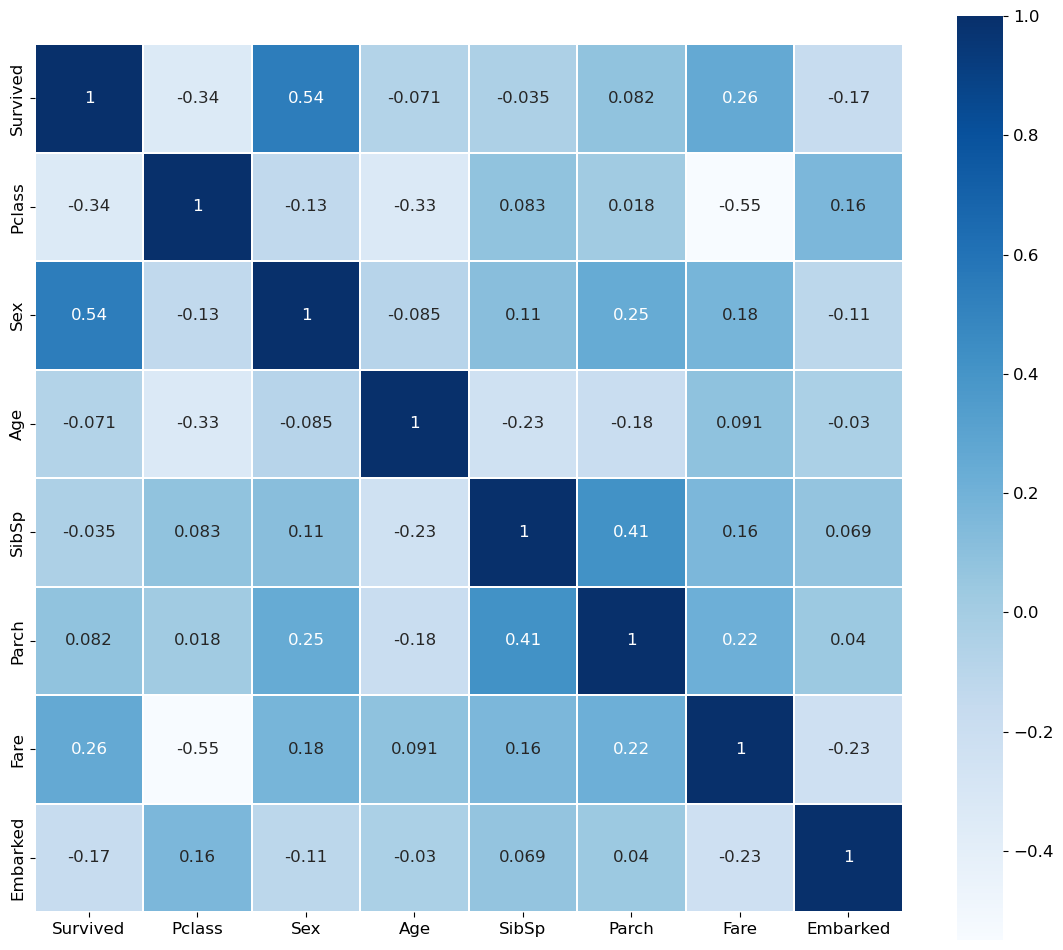

In [52]:
#finalmente graficamos un  mapa de calor que muestre la relacion entre variables 
plt.figure(figsize=(14,12))
sns.heatmap(datos.corr(), linewidths=0.1, square=True,  cmap='Blues', annot=True)
plt.show()